<h2>Hospital Readmission Prediction for Diabetic Patients</h2>

**Probelm Statement** - Hospital readmissions, particularly among diabetic patients, are costly and often preventable. The goal of this project is to develop a predictive model that can identify patients at high risk of readmission using historical electronic health record (EHR) data. By accurately predicting readmissions, healthcare providers can proactively intervene, improve patient outcomes, and reduce operational costs.

### Dataset Used

**Source**: [UCI Machine Learning Repository – Diabetes 130-US hospitals for years 1999–2008](https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008)             
**Description**: The dataset contains about 10 years of medical records for diabetic patients, including demographics, diagnoses, lab results, medications, and hospital outcomes.  
**Size**: 101,766 patient records from 130 U.S. hospitals  
**Features**:  
- Demographic: Race, Gender, Age  
- Clinical: Number of lab procedures, medications, diagnoses  
- Administrative: Admission type/source, discharge disposition  
- Target: `readmitted` (0 – No, 1 – Yes)

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#### Data Cleaning and Exploration

In [2]:
df = pd.read_csv("Data/diabetic_data.csv")
df.shape

(101766, 50)

In [3]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [5]:
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [6]:
df.isin(['?']).any()

encounter_id                False
patient_nbr                 False
race                         True
gender                      False
age                         False
weight                       True
admission_type_id           False
discharge_disposition_id    False
admission_source_id         False
time_in_hospital            False
payer_code                   True
medical_specialty            True
num_lab_procedures          False
num_procedures              False
num_medications             False
number_outpatient           False
number_emergency            False
number_inpatient            False
diag_1                       True
diag_2                       True
diag_3                       True
number_diagnoses            False
max_glu_serum               False
A1Cresult                   False
metformin                   False
repaglinide                 False
nateglinide                 False
chlorpropamide              False
glimepiride                 False
acetohexamide 

In [7]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [8]:
for col in df.columns:
    unique_val = df[col].unique()
    num_unique = len(unique_val)
    print(f"\n{col}: {num_unique} unique values")
    if num_unique < 15:
        print(unique_val)


encounter_id: 101766 unique values

patient_nbr: 71518 unique values

race: 6 unique values
['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']

gender: 3 unique values
['Female' 'Male' 'Unknown/Invalid']

age: 10 unique values
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']

weight: 10 unique values
['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']

admission_type_id: 8 unique values
[6 1 2 3 4 5 8 7]

discharge_disposition_id: 26 unique values

admission_source_id: 17 unique values

time_in_hospital: 14 unique values
[ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]

payer_code: 18 unique values

medical_specialty: 73 unique values

num_lab_procedures: 118 unique values

num_procedures: 7 unique values
[0 5 1 6 2 3 4]

num_medications: 75 unique values

number_outpatient: 39 unique values

number_emergency: 33 unique values

number_inpatient: 21 unique values

diag_1: 717 

In [9]:
for col in df.columns:
    if df[col].dtype == object:
        missing_count = (df[col] == '?').sum()
        if missing_count > 0:
            total_rows = len(df)
            percentage = round((missing_count / total_rows) * 100, 2)
            print(f'\nColumn {col} has {missing_count} occurrences of "?"')
            print(f'This represents {percentage}% of the total rows')


Column race has 2273 occurrences of "?"
This represents 2.23% of the total rows

Column weight has 98569 occurrences of "?"
This represents 96.86% of the total rows

Column payer_code has 40256 occurrences of "?"
This represents 39.56% of the total rows

Column medical_specialty has 49949 occurrences of "?"
This represents 49.08% of the total rows

Column diag_1 has 21 occurrences of "?"
This represents 0.02% of the total rows

Column diag_2 has 358 occurrences of "?"
This represents 0.35% of the total rows

Column diag_3 has 1423 occurrences of "?"
This represents 1.4% of the total rows


In [10]:
unknown_count = (df['gender'] == 'Unknown/Invalid').sum()
if unknown_count > 0:
    percentage = round((unknown_count / len(df)) * 100, 2)
    print(f'\nColumn "gender" has {unknown_count} occurrences of "Unknown/Invalid"')
    print(f'This represents {percentage}% of the total rows')


Column "gender" has 3 occurrences of "Unknown/Invalid"
This represents 0.0% of the total rows


In [11]:
df = df.drop(columns=['weight', 'payer_code', 'medical_specialty'])

In [12]:
df = df[
    (df['race'] != '?') & 
    (df['diag_1'] != '?') & 
    (df['diag_2'] != '?') & 
    (df['diag_3'] != '?') & 
    (df['gender'] != 'Unknown/Invalid')
]

In [13]:
df.isin(['?']).any()

encounter_id                False
patient_nbr                 False
race                        False
gender                      False
age                         False
admission_type_id           False
discharge_disposition_id    False
admission_source_id         False
time_in_hospital            False
num_lab_procedures          False
num_procedures              False
num_medications             False
number_outpatient           False
number_emergency            False
number_inpatient            False
diag_1                      False
diag_2                      False
diag_3                      False
number_diagnoses            False
max_glu_serum               False
A1Cresult                   False
metformin                   False
repaglinide                 False
nateglinide                 False
chlorpropamide              False
glimepiride                 False
acetohexamide               False
glipizide                   False
glyburide                   False
tolbutamide   

In [14]:
df.shape

(98052, 47)

In [15]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,No,Steady,No,No,No,No,No,No,Yes,>30


In [16]:
df.loc[:, df.nunique() == 1].head()

,examide,citoglipton,metformin-rosiglitazone
1,No,No,No
2,No,No,No
3,No,No,No
4,No,No,No
5,No,No,No


In [17]:
df = df.loc[:, df.nunique() != 1]

In [18]:
df.shape

(98052, 44)

In [19]:
total_values = df.shape[0]
missing_values = df.isnull().sum()
missing_percentage = (missing_values / total_values) * 100
missing_percentage[missing_percentage > 0]

max_glu_serum    94.688533
A1Cresult        83.485294
dtype: float64

In [20]:
df = df.drop(columns=['max_glu_serum', 'A1Cresult'])

In [21]:
df.shape

(98052, 42)

In [22]:
df['readmitted'].value_counts()

readmitted
NO     52337
>30    34649
<30    11066
Name: count, dtype: int64

In [23]:
df['readmitted'] = df['readmitted'].replace({'>30': 1, '<30': 1, 'NO': 0})
df['readmitted'].value_counts()

readmitted
0    52337
1    45715
Name: count, dtype: int64

#### Data Visualization and Analysis

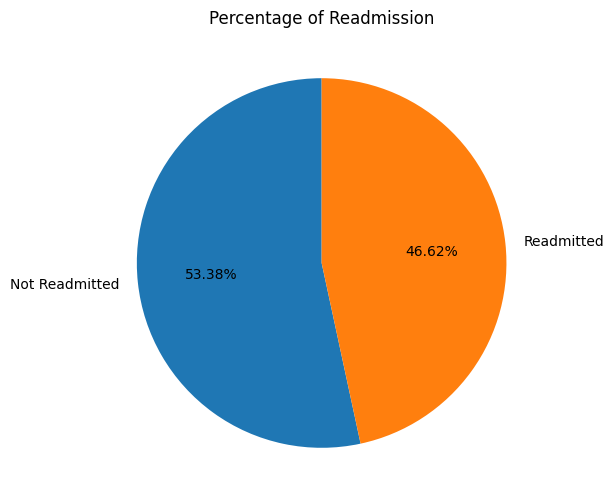

In [24]:
readmit_percet = round(df['readmitted'].value_counts(normalize=True) * 100, 2)  
labels = ['Not Readmitted', 'Readmitted']  
plt.figure(figsize=(6,6))  
plt.pie(readmit_percet, labels=labels, autopct='%1.2f%%', startangle=90) 
plt.title("Percentage of Readmission") 
plt.show()

In [25]:
df['age'].value_counts().sort_values()

age
[0-10)         65
[10-20)       466
[20-30)      1478
[90-100)     2717
[30-40)      3548
[40-50)      9265
[50-60)     16697
[80-90)     16702
[60-70)     21809
[70-80)     25305
Name: count, dtype: int64

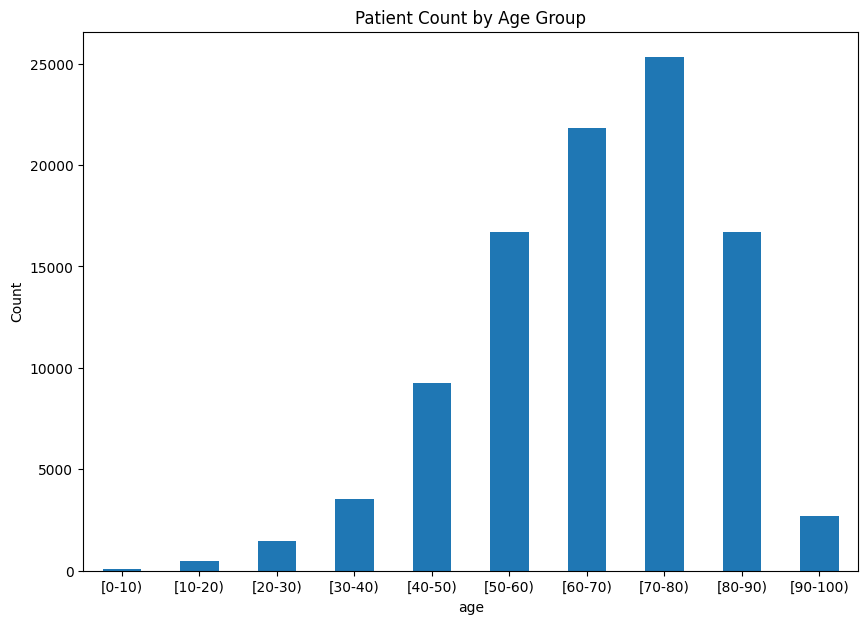

In [26]:
age_counts = df['age'].value_counts().sort_index()
plt.figure(figsize=(10, 7))
age_counts.plot(kind = 'bar')
plt.title("Patient Count by Age Group")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

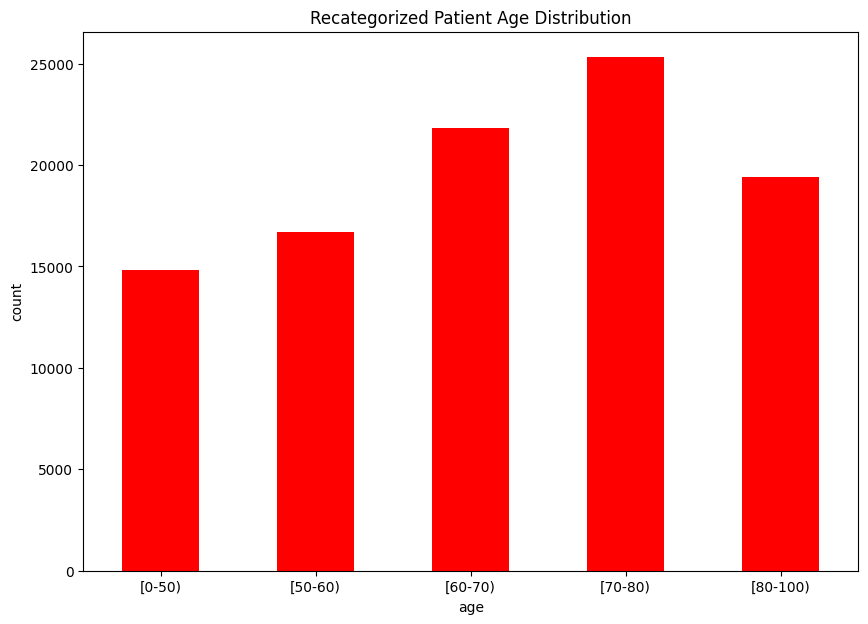

In [27]:
df['age'] = df['age'].replace(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)'], '[0-50)')  
df['age'] = df['age'].replace(['[80-90)', '[90-100)'], '[80-100)')  
plt.figure(figsize=(10,7))  
df.groupby('age').size().plot(kind='bar', color='red')  
plt.ylabel('count')  
plt.xticks(rotation=0)  
plt.title('Recategorized Patient Age Distribution')  
plt.show()

In [28]:
df['admission_type_id'].unique()  

array([1, 2, 3, 6, 4, 5, 8, 7])

In [29]:
df['admission_type_id'].nunique() 

8

#### Feature Engineering

In [30]:
df['admission_type_id'] = df['admission_type_id'].apply(lambda val: 'Emergency' if val == 1 else 'Other')  
df['admission_type_id'].nunique()  

2

In [31]:
df['admission_type_id'].value_counts()

admission_type_id
Emergency    52178
Other        45874
Name: count, dtype: int64

In [32]:
df['discharge_disposition_id'].unique()

array([ 1,  3,  6,  2,  5, 11,  7, 25, 10,  4, 14, 18,  8, 13, 12, 16, 17,
       22, 23,  9, 20, 15, 24, 28, 19, 27])

In [33]:
df['discharge_disposition_id'].nunique()

26

In [34]:
df['discharge_disposition_id'] = df['discharge_disposition_id'].apply(lambda val: 'Home' if val == 1 else 'Other')

In [35]:
df['discharge_disposition_id'].value_counts()

discharge_disposition_id
Home     57609
Other    40443
Name: count, dtype: int64

In [36]:
df['admission_source_id'].unique()

array([ 7,  2,  4,  1,  5,  6, 20,  3, 17,  8,  9, 14, 10, 22, 11, 25, 13])

In [37]:
df['admission_source_id'].nunique() 

17

In [38]:
df['admission_source_id'] = df['admission_source_id'].apply(
    lambda val: 'Emergency Room' if val == 7 else ('Referral' if val == 1 else 'Other')
)

In [39]:
df['admission_source_id'].value_counts()

admission_source_id
Emergency Room    55951
Referral          28355
Other             13746
Name: count, dtype: int64

In [40]:
diagnosis = df[['diag_1', 'diag_2', 'diag_3']]
diagnosis.head(10)

,diag_1,diag_2,diag_3
1,276,250.01,255
2,648,250,V27
3,8,250.43,403
4,197,157,250
5,414,411,250
6,414,411,V45
7,428,492,250
8,398,427,38
9,434,198,486
10,250.7,403,996


In [41]:
diagnosis.isnull().sum()

diag_1    0
diag_2    0
diag_3    0
dtype: int64

In [42]:
import re

def calculate_comorbidity(row):
    diabetes_disease_codes = r"^250" 
    circulatory_disease_codes = r"^39\d|^4[0-6]\d"  
    comorbidity_value = 0
    diagnoses = [str(row['diag_1']), str(row['diag_2']), str(row['diag_3'])]
  
    diabetes_found = any(bool(re.match(diabetes_disease_codes, diag)) for diag in diagnoses)
    circulatory_found = any(bool(re.match(circulatory_disease_codes, diag)) for diag in diagnoses)

    if diabetes_found and circulatory_found:
        comorbidity_value = 3 
    elif diabetes_found:
        comorbidity_value = 1 
    elif circulatory_found:
        comorbidity_value = 2 
    
    return comorbidity_value

In [43]:
df['comorbidity'] = diagnosis.apply(calculate_comorbidity, axis=1)

In [44]:
df.shape

(98052, 43)

In [45]:
df.head(10)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,comorbidity
1,149190,55629189,Caucasian,Female,[0-50),Emergency,Home,Emergency Room,3,59,...,No,Up,No,No,No,No,Ch,Yes,1,1
2,64410,86047875,AfricanAmerican,Female,[0-50),Emergency,Home,Emergency Room,2,11,...,No,No,No,No,No,No,No,Yes,0,1
3,500364,82442376,Caucasian,Male,[0-50),Emergency,Home,Emergency Room,2,44,...,No,Up,No,No,No,No,Ch,Yes,0,3
4,16680,42519267,Caucasian,Male,[0-50),Emergency,Home,Emergency Room,1,51,...,No,Steady,No,No,No,No,Ch,Yes,0,1
5,35754,82637451,Caucasian,Male,[50-60),Other,Home,Other,3,31,...,No,Steady,No,No,No,No,No,Yes,1,3
6,55842,84259809,Caucasian,Male,[60-70),Other,Home,Other,4,70,...,No,Steady,No,No,No,No,Ch,Yes,0,2
7,63768,114882984,Caucasian,Male,[70-80),Emergency,Home,Emergency Room,5,73,...,No,No,No,No,No,No,No,Yes,1,3
8,12522,48330783,Caucasian,Female,[80-100),Other,Home,Other,13,68,...,No,Steady,No,No,No,No,Ch,Yes,0,2
9,15738,63555939,Caucasian,Female,[80-100),Other,Other,Other,12,33,...,No,Steady,No,No,No,No,Ch,Yes,0,2
10,28236,89869032,AfricanAmerican,Female,[0-50),Emergency,Home,Emergency Room,9,47,...,No,Steady,No,No,No,No,No,Yes,1,3


In [46]:
df['comorbidity'].unique()

array([1, 3, 2, 0])

In [47]:
df['comorbidity'].value_counts()

comorbidity
2    39807
0    22389
1    17984
3    17872
Name: count, dtype: int64

In [48]:
df.drop(['diag_1', 'diag_2', 'diag_3'], axis=1, inplace=True)

In [49]:
percent_com = pd.crosstab(df['comorbidity'], df['readmitted'], normalize='index') * 100
percent_com

readmitted,0,1
comorbidity,,
0,55.509402,44.490598
1,53.831183,46.168817
2,51.782350,48.217650
3,53.799239,46.200761


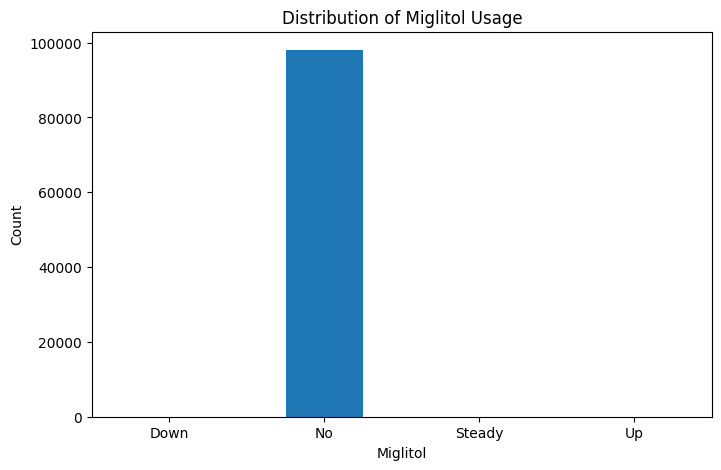

In [50]:
plt.figure(figsize=(8, 5))
df.groupby('miglitol').size().plot(kind='bar')
plt.xlabel('Miglitol')
plt.ylabel('Count')
plt.title('Distribution of Miglitol Usage')
plt.xticks(rotation = 0)
plt.show()

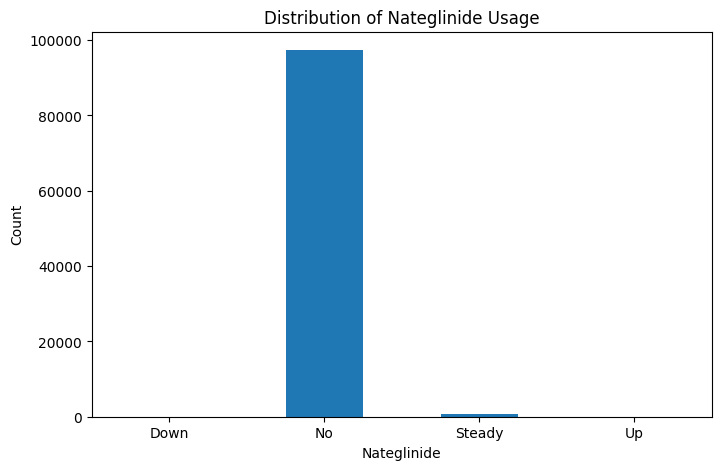

In [51]:
plt.figure(figsize=(8, 5))
df.groupby('nateglinide').size().plot(kind='bar')
plt.xlabel('Nateglinide')
plt.ylabel('Count')
plt.title('Distribution of Nateglinide Usage')
plt.xticks(rotation = 0)
plt.show()

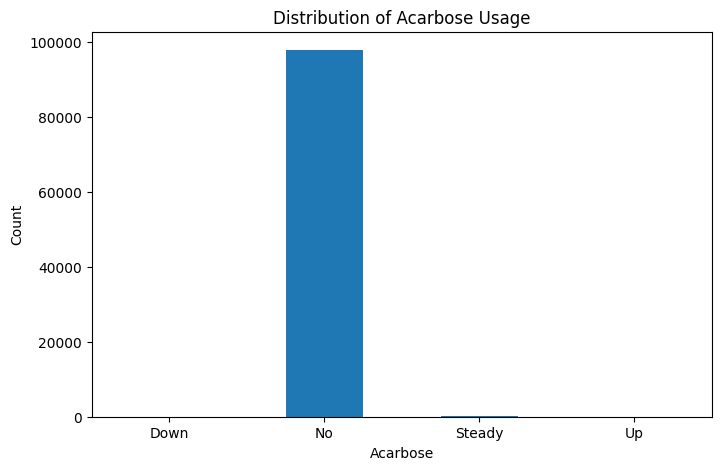

In [52]:
plt.figure(figsize=(8, 5))
df.groupby('acarbose').size().plot(kind='bar')
plt.xlabel('Acarbose')
plt.ylabel('Count')
plt.title('Distribution of Acarbose Usage')
plt.xticks(rotation = 0)
plt.show()

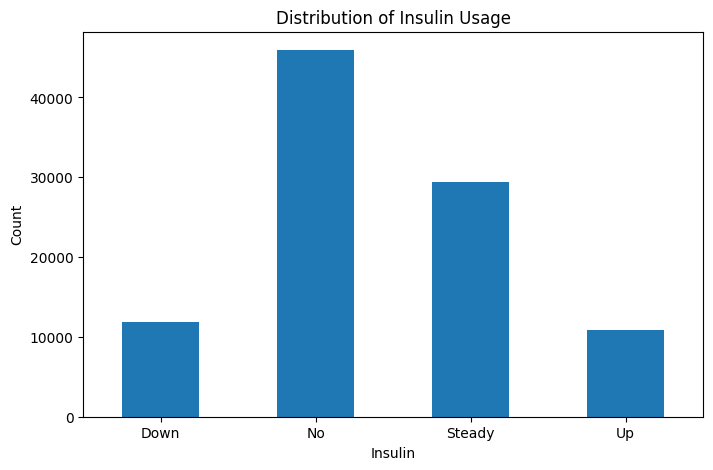

In [53]:
plt.figure(figsize=(8, 5))
df.groupby('insulin').size().plot(kind='bar')
plt.xlabel('Insulin')
plt.ylabel('Count')
plt.title('Distribution of Insulin Usage')
plt.xticks(rotation = 0)
plt.show()

In [54]:
medications = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
               'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol',
               'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
               'glimepiride-pioglitazone', 'metformin-pioglitazone']

In [55]:
for col in medications:
    if col in df.columns:
        colname = str(col) + 'temp'
        df[colname] = df[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)

In [56]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,rosiglitazonetemp,acarbosetemp,miglitoltemp,troglitazonetemp,tolazamidetemp,insulintemp,glyburide-metformintemp,glipizide-metformintemp,glimepiride-pioglitazonetemp,metformin-pioglitazonetemp
1,149190,55629189,Caucasian,Female,[0-50),Emergency,Home,Emergency Room,3,59,...,0,0,0,0,0,1,0,0,0,0
2,64410,86047875,AfricanAmerican,Female,[0-50),Emergency,Home,Emergency Room,2,11,...,0,0,0,0,0,0,0,0,0,0
3,500364,82442376,Caucasian,Male,[0-50),Emergency,Home,Emergency Room,2,44,...,0,0,0,0,0,1,0,0,0,0
4,16680,42519267,Caucasian,Male,[0-50),Emergency,Home,Emergency Room,1,51,...,0,0,0,0,0,0,0,0,0,0
5,35754,82637451,Caucasian,Male,[50-60),Other,Home,Other,3,31,...,0,0,0,0,0,0,0,0,0,0


In [57]:
df['num_med_dosage_changes'] = 0

In [58]:
for col in medications:
    if col in df.columns:
        colname = str(col) + 'temp'
        df['num_med_dosage_changes'] = df['num_med_dosage_changes'] + df[colname]
        del df[colname]

In [59]:
df.num_med_dosage_changes.value_counts()

num_med_dosage_changes
0    71309
1    25350
2     1281
3      107
4        5
Name: count, dtype: int64

In [60]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,comorbidity,num_med_dosage_changes
1,149190,55629189,Caucasian,Female,[0-50),Emergency,Home,Emergency Room,3,59,...,Up,No,No,No,No,Ch,Yes,1,1,1
2,64410,86047875,AfricanAmerican,Female,[0-50),Emergency,Home,Emergency Room,2,11,...,No,No,No,No,No,No,Yes,0,1,0
3,500364,82442376,Caucasian,Male,[0-50),Emergency,Home,Emergency Room,2,44,...,Up,No,No,No,No,Ch,Yes,0,3,1
4,16680,42519267,Caucasian,Male,[0-50),Emergency,Home,Emergency Room,1,51,...,Steady,No,No,No,No,Ch,Yes,0,1,0
5,35754,82637451,Caucasian,Male,[50-60),Other,Home,Other,3,31,...,Steady,No,No,No,No,No,Yes,1,3,0


In [61]:
for col in medications:
    if col in df.columns:
        df[col] = df[col].replace('No', 0)
        df[col] = df[col].replace('Steady', 1)
        df[col] = df[col].replace('Up', 1)
        df[col] = df[col].replace('Down', 1)

In [62]:
df['num_med'] = 0

In [63]:
for col in medications:
    if col in df.columns:
        df['num_med'] = df['num_med'] + df[col]

In [64]:
df['num_med'].value_counts()

num_med
1    45447
0    22702
2    21056
3     7485
4     1300
5       57
6        5
Name: count, dtype: int64

In [65]:
df = df.drop(columns=medications)

In [66]:
df.shape

(98052, 22)

In [67]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabetesMed,readmitted,comorbidity,num_med_dosage_changes,num_med
1,149190,55629189,Caucasian,Female,[0-50),Emergency,Home,Emergency Room,3,59,...,0,0,0,9,Ch,Yes,1,1,1,1
2,64410,86047875,AfricanAmerican,Female,[0-50),Emergency,Home,Emergency Room,2,11,...,2,0,1,6,No,Yes,0,1,0,1
3,500364,82442376,Caucasian,Male,[0-50),Emergency,Home,Emergency Room,2,44,...,0,0,0,7,Ch,Yes,0,3,1,1
4,16680,42519267,Caucasian,Male,[0-50),Emergency,Home,Emergency Room,1,51,...,0,0,0,5,Ch,Yes,0,1,0,2
5,35754,82637451,Caucasian,Male,[50-60),Other,Home,Other,3,31,...,0,0,0,9,No,Yes,1,3,0,1


In [68]:
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
admission_type_id           object
discharge_disposition_id    object
admission_source_id         object
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
number_diagnoses             int64
change                      object
diabetesMed                 object
readmitted                   int64
comorbidity                  int64
num_med_dosage_changes       int64
num_med                      int64
dtype: object

In [69]:
df['change'].value_counts()

change
No    52774
Ch    45278
Name: count, dtype: int64

In [70]:
df['gender'].value_counts()

gender
Female    52833
Male      45219
Name: count, dtype: int64

In [71]:
df['diabetesMed'].value_counts()

diabetesMed
Yes    75350
No     22702
Name: count, dtype: int64

In [72]:
# 'Ch' (Change in medication) -> 1, 'No' (No change) -> 0
df['change'] = df['change'].replace('Ch', 1)
df['change'] = df['change'].replace('No', 0)

# 'Male' -> 1, 'Female' -> 0
df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Female', 0)

# 'Yes' (Patient is on diabetes medication) -> 1, 'No' (Not on medication) -> 0
df['diabetesMed'] = df['diabetesMed'].replace('Yes', 1)
df['diabetesMed'] = df['diabetesMed'].replace('No', 0)

In [73]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabetesMed,readmitted,comorbidity,num_med_dosage_changes,num_med
1,149190,55629189,Caucasian,0,[0-50),Emergency,Home,Emergency Room,3,59,...,0,0,0,9,1,1,1,1,1,1
2,64410,86047875,AfricanAmerican,0,[0-50),Emergency,Home,Emergency Room,2,11,...,2,0,1,6,0,1,0,1,0,1
3,500364,82442376,Caucasian,1,[0-50),Emergency,Home,Emergency Room,2,44,...,0,0,0,7,1,1,0,3,1,1
4,16680,42519267,Caucasian,1,[0-50),Emergency,Home,Emergency Room,1,51,...,0,0,0,5,1,1,0,1,0,2
5,35754,82637451,Caucasian,1,[50-60),Other,Home,Other,3,31,...,0,0,0,9,0,1,1,3,0,1


In [74]:
df = df.drop_duplicates(subset=['patient_nbr'], keep='first')

In [75]:
df.shape

(68629, 22)

In [76]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabetesMed,readmitted,comorbidity,num_med_dosage_changes,num_med
1,149190,55629189,Caucasian,0,[0-50),Emergency,Home,Emergency Room,3,59,...,0,0,0,9,1,1,1,1,1,1
2,64410,86047875,AfricanAmerican,0,[0-50),Emergency,Home,Emergency Room,2,11,...,2,0,1,6,0,1,0,1,0,1
3,500364,82442376,Caucasian,1,[0-50),Emergency,Home,Emergency Room,2,44,...,0,0,0,7,1,1,0,3,1,1
4,16680,42519267,Caucasian,1,[0-50),Emergency,Home,Emergency Room,1,51,...,0,0,0,5,1,1,0,1,0,2
5,35754,82637451,Caucasian,1,[50-60),Other,Home,Other,3,31,...,0,0,0,9,0,1,1,3,0,1


In [77]:
categorical_cols = ['race', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [78]:
age_order = {
    '[0-50)': 0,
    '[50-60)': 1,
    '[60-70)': 2,
    '[70-80)': 3,
    '[80-100)': 4
}

df_encoded['age'] = df_encoded['age'].map(age_order)

### Training Models

#### Splitting data into train and test

In [79]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(['readmitted', 'encounter_id', 'patient_nbr'], axis=1)
y = df_encoded['readmitted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Baseline Logistic Regression

              precision    recall  f1-score   support

           0       0.63      0.91      0.75      8232
           1       0.61      0.21      0.31      5494

    accuracy                           0.63     13726
   macro avg       0.62      0.56      0.53     13726
weighted avg       0.62      0.63      0.57     13726



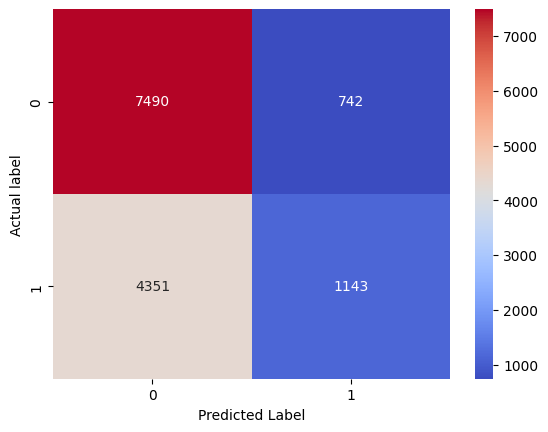

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model_lr_base = LogisticRegression()
model_lr_base.fit(X_train, y_train)
y_pred = model_lr_base.predict(X_test)

report = classification_report(y_test, y_pred)
print(report)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="coolwarm", fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('Actual label')
plt.show()

#### Logistic Regression with Class Weight Balanced

              precision    recall  f1-score   support

           0       0.67      0.63      0.65      8232
           1       0.50      0.54      0.52      5494

    accuracy                           0.60     13726
   macro avg       0.59      0.59      0.59     13726
weighted avg       0.60      0.60      0.60     13726



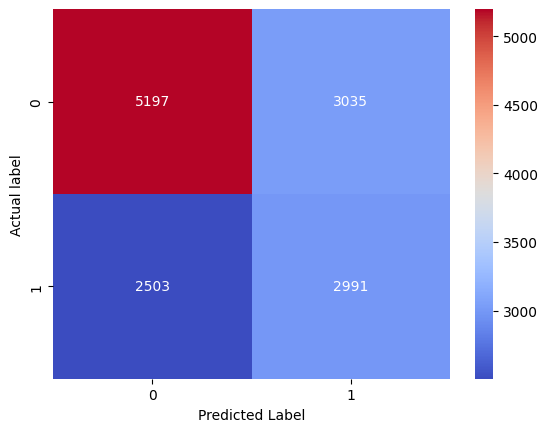

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model_lr_balance = LogisticRegression(class_weight='balanced')
model_lr_balance.fit(X_train, y_train)
y_pred = model_lr_balance.predict(X_test)

report = classification_report(y_test, y_pred)
print(report)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="coolwarm", fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('Actual label')
plt.show()

#### Decision Tree

              precision    recall  f1-score   support

           0       0.63      0.61      0.62      8232
           1       0.44      0.45      0.44      5494

    accuracy                           0.55     13726
   macro avg       0.53      0.53      0.53     13726
weighted avg       0.55      0.55      0.55     13726



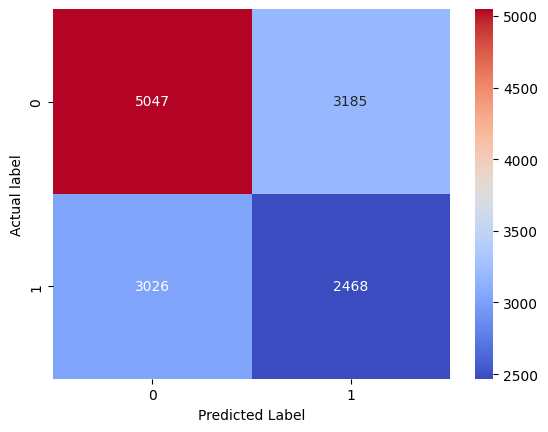

In [82]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(class_weight='balanced')
model_dt.fit(X_train, y_train)
y_pred = model_dt.predict(X_test)

report = classification_report(y_test, y_pred)
print(report)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="coolwarm", fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('Actual label')
plt.show()

#### Random Forest

              precision    recall  f1-score   support

           0       0.68      0.62      0.65      8232
           1       0.50      0.57      0.53      5494

    accuracy                           0.60     13726
   macro avg       0.59      0.60      0.59     13726
weighted avg       0.61      0.60      0.60     13726



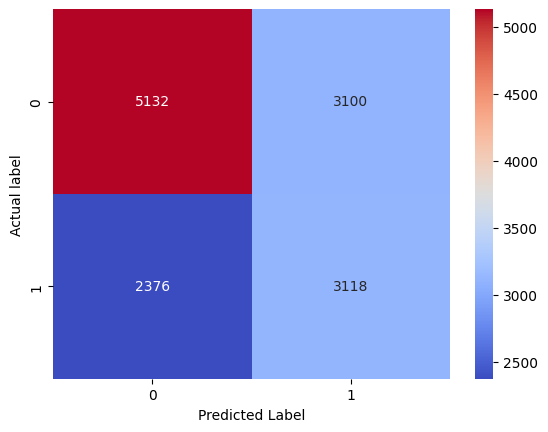

In [83]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=200, max_depth=10, class_weight='balanced')
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)

report = classification_report(y_test, y_pred)
print(report)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="coolwarm", fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('Actual label')
plt.show()

#### XGBoost

              precision    recall  f1-score   support

           0       0.74      0.29      0.42      8232
           1       0.44      0.84      0.58      5494

    accuracy                           0.51     13726
   macro avg       0.59      0.57      0.50     13726
weighted avg       0.62      0.51      0.48     13726



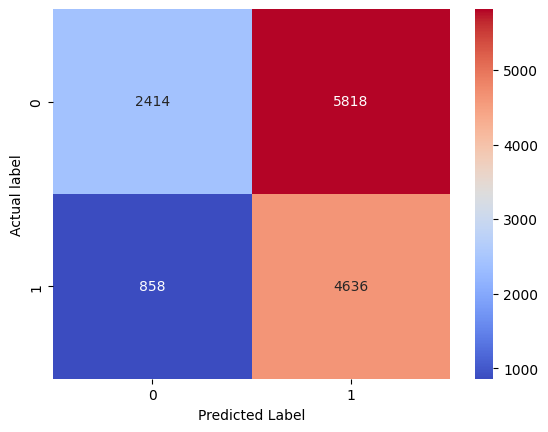

In [84]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier(scale_pos_weight=(len(y_train) / y_train.sum()), eval_metric='logloss')
model_xgb.fit(X_train, y_train)
y_pred = model_xgb.predict(X_test)

report = classification_report(y_test, y_pred)
print(report)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="coolwarm", fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('Actual label')
plt.show()

#### Plotting ROC-AUC Curce

In [85]:
y_proba_logistic = model_lr_base.predict_proba(X_test)[:, 1]
y_proba_balanced = model_lr_balance.predict_proba(X_test)[:, 1]
y_proba_dt = model_dt.predict_proba(X_test)[:, 1]
y_proba_rf = model_rf.predict_proba(X_test)[:, 1]
y_proba_xgb = model_xgb.predict_proba(X_test)[:, 1]

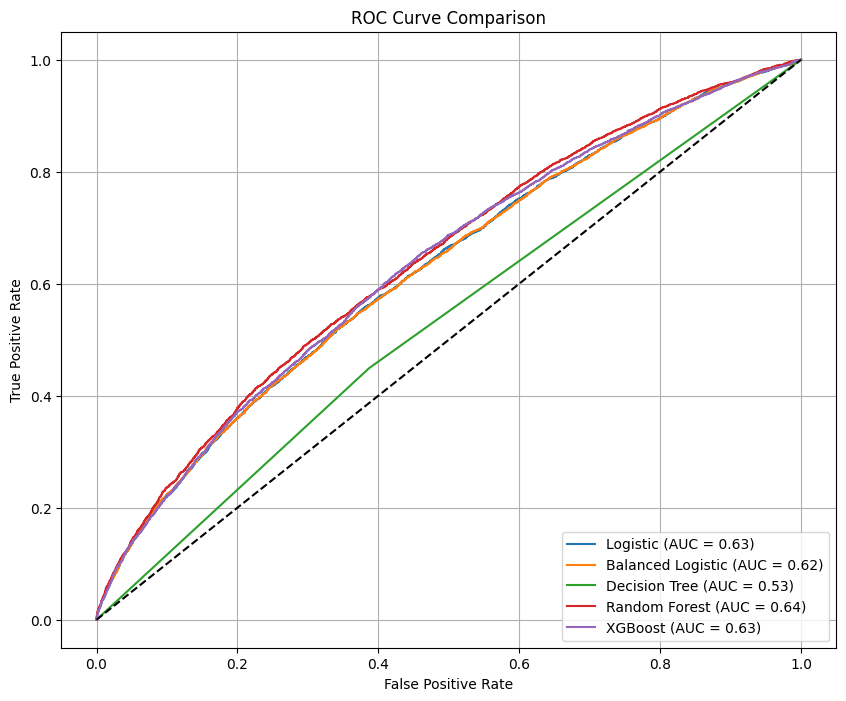

In [86]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))

# Logistic Regression (baseline)
fpr1, tpr1, _ = roc_curve(y_test, y_proba_logistic)
plt.plot(fpr1, tpr1, label=f"Logistic (AUC = {auc(fpr1, tpr1):.2f})")

# Logistic with class_weight
fpr2, tpr2, _ = roc_curve(y_test, y_proba_balanced)
plt.plot(fpr2, tpr2, label=f"Balanced Logistic (AUC = {auc(fpr2, tpr2):.2f})")

# Decision Tree
fpr4, tpr4, _ = roc_curve(y_test, y_proba_dt)
plt.plot(fpr4, tpr4, label=f"Decision Tree (AUC = {auc(fpr4, tpr4):.2f})")

# Random Forest
fpr4, tpr4, _ = roc_curve(y_test, y_proba_rf)
plt.plot(fpr4, tpr4, label=f"Random Forest (AUC = {auc(fpr4, tpr4):.2f})")

# XGB
fpr4, tpr4, _ = roc_curve(y_test, y_proba_xgb)
plt.plot(fpr4, tpr4, label=f"XGBoost (AUC = {auc(fpr4, tpr4):.2f})")

# Plot formatting
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid()
plt.show()

### Final Conclusion

In this project, I tackled the problem of predicting hospital readmissions among diabetic patients using machine learning techniques. The dataset presented a moderate class imbalance (~60:40 between non-readmitted and readmitted cases), which was addressed using both SMOTE (Synthetic Minority Oversampling Technique) and class weighting to enhance the model's ability to detect true readmissions.

I trained and evaluated four machine learning models:

- Logistic Regression  
- Balanced Logistic Regression  
- Random Forest  
- XGBoost  

### Key Findings:

- Logistic Regression with class weighting offered the most balanced performance, achieving an F1-score of **0.52** and recall of **0.54**, making it effective for real-world deployment where capturing true readmissions is vital.  
- SMOTE improved recall further (up to **0.56**) but slightly reduced overall precision, highlighting the trade-off between recall and false positives.  
- Random Forest provided a higher AUC (**0.64**), showing strong discriminatory power but was slightly biased toward the majority class without tuning.  
- XGBoost performed comparably to other models but did not significantly outperform Logistic Regression in this specific context.

### Visualizations and Analysis:

- Explored patient demographics, lab procedures, hospital stay duration, and medication behavior through visualizations.
- Addressed class imbalance using SMOTE and evaluated models using classification reports and ROC-AUC curves.
- Compared model performance across various thresholds to balance precision and recall effectively.

### Final Recommendation:

For practical hospital use cases where it's crucial to **catch as many at-risk patients as possible**, **Logistic Regression with class weighting and threshold tuning** is recommended. It balances interpretability, performance, and ease of deployment, making it ideal for decision support in clinical settings.

This project demonstrates how machine learning can enhance hospital resource allocation, reduce preventable readmissions, and support better patient outcomes through data-driven risk prediction.